### Setup

In [1]:
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
df = pd.read_csv('/mnt/data/churndata.csv', header=0, index_col=0)
print(len(df), " rows")
df.head()

8004  rows


,AreaCode,age,gender,kids,education,income,dataplan,basebill,bill,mins,...,Storage,Touchscreen,Color,KPI_DeviceSat,KPI_NetworkQual,servcalls,drops,dropperc,CompPromo60,churn
custid,,,,,,,,,,,,,,,,,,,,,
844336,612,45,F,2,11,89.2,4096,61.81,71.44,550,...,Y,Y,silver,0.016035,0.760355,0,9,0.016364,NoPromo,N
146041,317,43,F,1,9,54.2,2048,110.27,124.23,545,...,N,Y,black,0.017055,0.526147,0,10,0.018349,NoPromo,N
847745,278,41,F,1,12,55.3,2048,104.22,112.42,378,...,Y,Y,black,0.008896,0.798811,0,7,0.018519,Promo,N
285565,408,31,M,0,10,66.8,4096,95.69,105.12,552,...,Y,Y,black,0.016460,0.631075,0,8,0.014493,NoPromo,N
754611,305,43,F,0,8,87.2,2048,95.40,109.48,577,...,Y,Y,white,0.020711,0.726428,0,7,0.012132,NoPromo,N


### Build a Data Quality Report

In [3]:
# input a dataframe
# returns a dataframe with helpful statistics on the dataframe and its columns
# modified for py3

def dqr(d):
    #data types
    dqr_data_types = pd.DataFrame(d.dtypes, columns=['Data Type'])

    #percent missing
    dqr_percent_missing = pd.DataFrame(100*(d.isnull().sum()/len(d)).round(3), columns=['% Missing'])

    #unique values
    dqr_unique_values = pd.DataFrame(columns=['Unique Values'])
    for c in d:
        dqr_unique_values.loc[c]=d[c].nunique()
        
    #mode
    dqr_mode = pd.DataFrame(d.mode().loc[0])
    dqr_mode.rename(columns={ dqr_mode.columns[0]: "Mode" }, inplace=True)
    
    #count mode
    dqr_count_mode = pd.DataFrame(columns=['Count Mode'])
    for c in d:
        dqr_count_mode.loc[c]=d[c][d[c] == dqr_mode.loc[[c]].iloc[0]['Mode']].count()  

    #% mode
    dqr_percent_mode = pd.DataFrame(100*(dqr_count_mode['Count Mode'].values/len(d)), \
        index=dqr_count_mode.index, columns=['% Mode'])
            
    #distribution stats    
    i=1
    for c in d:
        if i==1:
            dqr_stats = pd.DataFrame(d[c].describe())
        if i>1:
            dqr_stats = dqr_stats.join(pd.DataFrame(d[c].describe()))
        i=i+1
    dqr_stats=dqr_stats.transpose().drop('count', axis=1)

    print("# of records: ", len(d))
    print("# of columns: ", len(d.columns))
    
    # don't include count mode
    # .join(dqr_count_mode[['Count Mode']].astype(int))
    
    return dqr_data_types.join(dqr_unique_values[['Unique Values']].astype(int)). \
        join(dqr_percent_missing).join(dqr_mode).join(dqr_percent_mode).join(dqr_stats)


In [4]:
report = dqr(df)
report

# of records:  8004
# of columns:  34


,Data Type,Unique Values,% Missing,Mode,% Mode,mean,std,min,25%,50%,75%,max
AreaCode,int64,173,0.0,417,3.14843,519.834,193.001,202,323,563,702,865
age,int64,72,0.0,40,4.21039,41.4117,10.1019,2,35,41,48,84
gender,object,2,0.0,F,50.2624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kids,int64,7,0.0,1,38.4433,1.19928,1.00835,0,0,1,2,6
education,int64,16,0.0,9,18.6532,9.36057,2.05575,2,8,9,11,17
income,float64,1024,0.0,67.8,0.412294,70.0953,20.0531,-0.8,56.5,69.75,83.7,139.4
dataplan,int64,3,0.0,2048,34.0955,4068.88,1674.58,2048,2048,4096,6144,6144
basebill,float64,5652,0.0,105.45,0.0874563,99.5781,29.7962,-5.82,79.6925,99.805,118.852,212.78
bill,float64,5733,0.0,98.39,0.0749625,109.691,30.1054,6.11,89.7,109.915,129.512,223.72
mins,int64,558,0.0,501,0.562219,501.664,99.6831,132,435,502,568,865


### Change Col Types as Needed

In [5]:
# areacode to object
df[['AreaCode']] = df[['AreaCode']].astype(object)

# reset the report dataframe
report = dqr(df)

# of records:  8004
# of columns:  34


### Create Dummy Variables Quickly

In [6]:
def create_dummies(data, cols, drop1st):
    i=1
    for c in cols:
        create_dummies_i = pd.get_dummies(data[c],prefix=c, drop_first=drop1st)  
        data=pd.concat([data,create_dummies_i],axis=1)
        i=i+1
        data = data.drop([c], axis=1)
    return data

In [7]:
# all categorical columns
temp = report[report['Data Type'] == 'object']
list1 = list(temp.index.values)
list1

['AreaCode',
 'gender',
 'undercontract',
 'Manufacturer',
 'Model',
 'Version',
 'OS',
 'Patch',
 'Mem',
 'Storage',
 'Touchscreen',
 'Color',
 'CompPromo60',
 'churn']

In [8]:
# calling the create_dummies function
df = create_dummies(df, list1, True)
df.head()

,age,kids,education,income,dataplan,basebill,bill,mins,calls,long,...,Mem_8GB,Storage_Y,Touchscreen_Y,Color_gold,Color_green,Color_red,Color_silver,Color_white,CompPromo60_Promo,churn_Y
custid,,,,,,,,,,,,,,,,,,,,,
844336,45,2,11,89.2,4096,61.81,71.44,550,55,35,...,0,1,1,0,0,0,1,0,0,0
146041,43,1,9,54.2,2048,110.27,124.23,545,66,35,...,0,0,1,0,0,0,0,0,0,0
847745,41,1,12,55.3,2048,104.22,112.42,378,91,19,...,1,1,1,0,0,0,0,0,1,0
285565,31,0,10,66.8,4096,95.69,105.12,552,71,38,...,0,1,1,0,0,0,0,0,0,0
754611,43,0,8,87.2,2048,95.40,109.48,577,56,31,...,0,1,1,0,0,0,0,1,0,0


### Cleanup Bad Data

In [9]:
a = len(df)

df.dropna()
df.drop(df[df.age < 18].index, inplace=True)
df.drop(df[df.income < 0].index, inplace=True)
df.drop(df[df.kids < 0].index, inplace=True)
df.drop(df[df.basebill < 0].index, inplace=True)
df.drop(df[df.bill < 0].index, inplace=True)
df.drop(df[df.calls < 0].index, inplace=True)
df.drop(df[df.mins < 0].index, inplace=True)
df.drop(df[df.long < 0].index, inplace=True)
df.drop(df[df.datause < 0].index, inplace=True)
df.drop(df[df.servcalls < 0].index, inplace=True)
df.drop(df[df.drops < 0].index, inplace=True)
df.drop(df[df.consecmonths < 0].index, inplace=True)

print("Rows discarded: ", a - len(df))

Rows discarded:  65


### Get a Feel For Important Variables

In [10]:
cols = list(df.columns)
cols.remove('churn_Y')
y = df["churn_Y"]
X = df[cols]

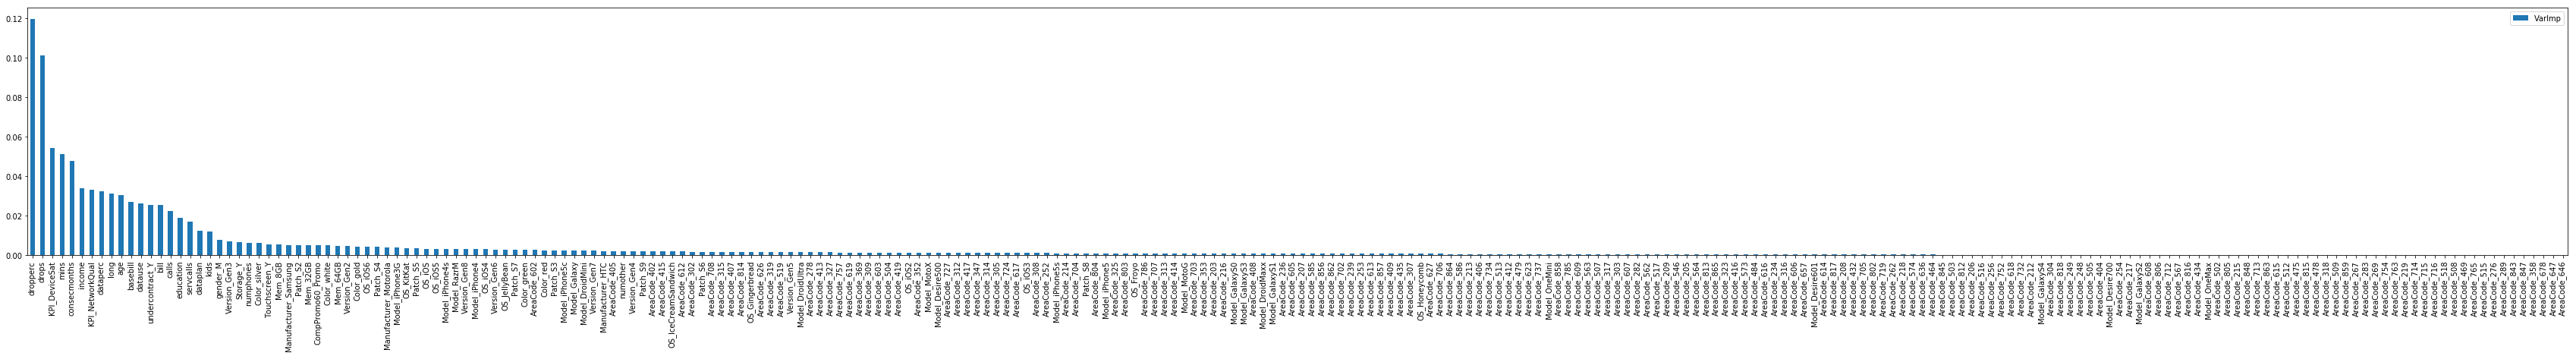

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X.values, y.values.ravel())

importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=X.columns, columns=["VarImp"])
importance.sort_values(by='VarImp', ascending=False, inplace=True)

plt.rcParams['figure.figsize'] = [60, 6]
importance.plot.bar()
plt.show()

In [12]:
# choose a cutoff
cutoff = importance.loc['kids'].values[0]
keep_cols = list(importance[importance['VarImp'] >= cutoff].index.values)
keep_cols.append('churn_Y')

In [13]:
df2 = df[keep_cols]
list(df2.columns)

['dropperc',
 'drops',
 'KPI_DeviceSat',
 'mins',
 'consecmonths',
 'income',
 'KPI_NetworkQual',
 'dataperc',
 'long',
 'age',
 'basebill',
 'datause',
 'undercontract_Y',
 'bill',
 'calls',
 'education',
 'servcalls',
 'dataplan',
 'kids',
 'churn_Y']

### Graphical Exploration

#### top 4 scatterplot matrix
#### drop and dropperc are highly correlated no need for both

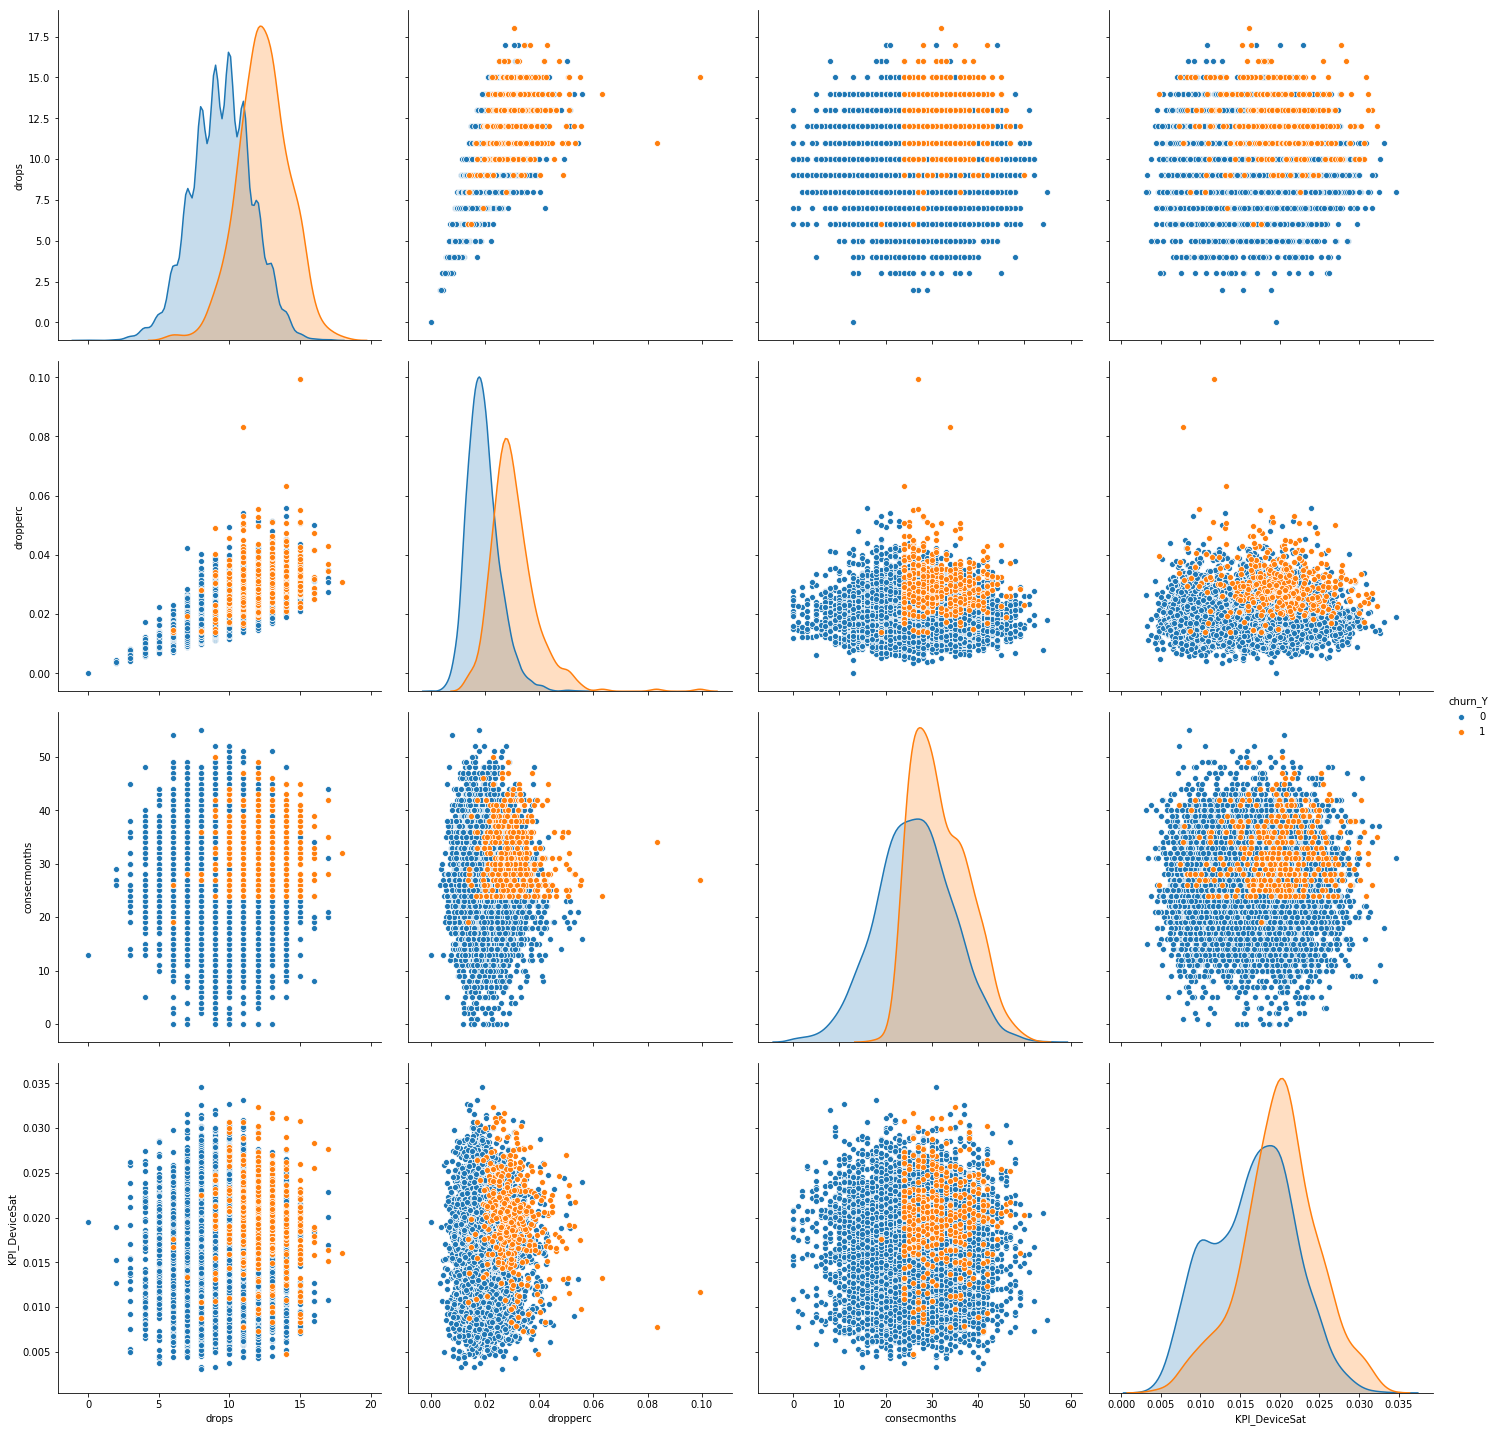

In [14]:
sns.pairplot(vars=['drops', 'dropperc', 'consecmonths', 'KPI_DeviceSat'], data=df2, hue="churn_Y", size=5)

#### bill and basebill are highly correlated no need for both

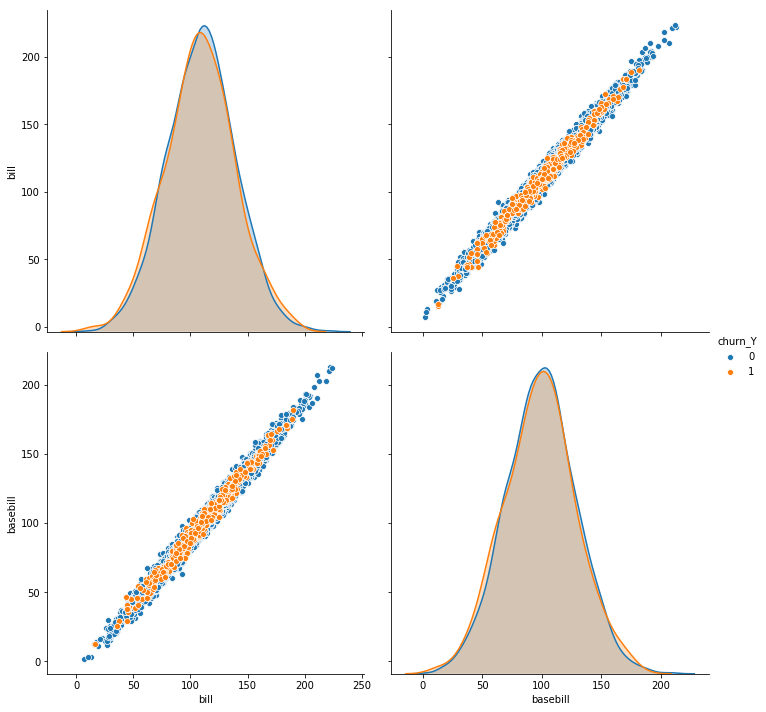

In [15]:
sns.pairplot(vars=['bill', 'basebill'], data=df2, hue="churn_Y", size=5)

#### undercontract and consecutive months are the same
#### drop undercontract as consec months has more information

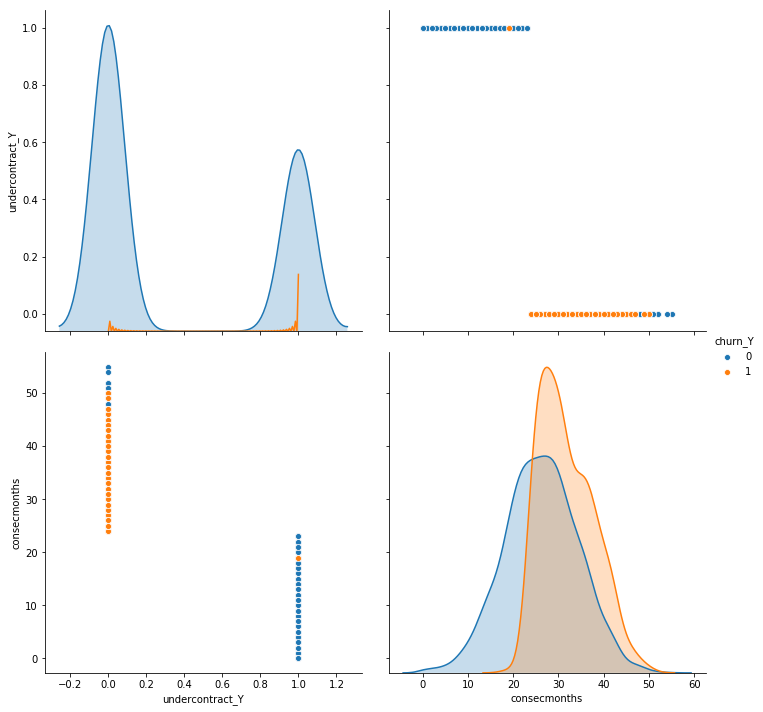

In [16]:
sns.pairplot(vars=['undercontract_Y', 'consecmonths'], data=df2, hue="churn_Y", size=5)

In [17]:
# drop fields
df2 = df2.drop(['drops'],axis=1)
df2 = df2.drop(['undercontract_Y'],axis=1)
df2 = df2.drop(['basebill'],axis=1)

### Rerun Variable Importance

In [18]:
cols = list(df2.columns)
cols.remove('churn_Y')
y = df2["churn_Y"]
X = df2[cols]

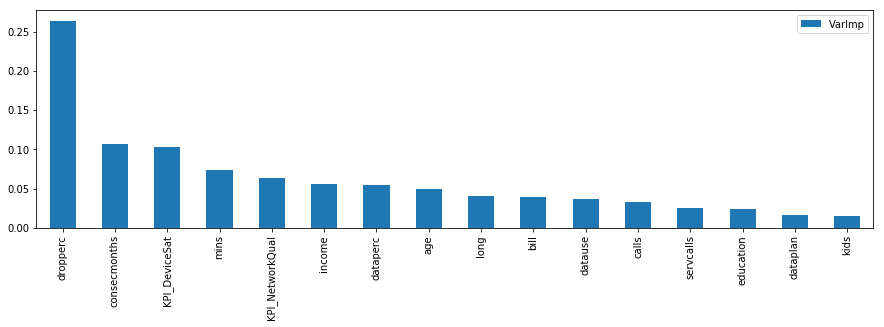

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X.values, y.values.ravel())

importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=X.columns, columns=["VarImp"])
importance.sort_values(by='VarImp', ascending=False, inplace=True)

plt.rcParams['figure.figsize'] = [15, 4]
importance.plot.bar()
plt.show()

### Write Data to Disk

In [20]:
df2.to_csv('/mnt/data/prepared.csv')